## New York City OSMNx Driving Network + Simulation
Author: Callie Clark
Last Updated: 5/21/2024



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import networkx as nx
import osmnx as ox
import json

%matplotlib inline
ox.__version__

from scipy.spatial import cKDTree
from TT_functions import *
import random

In [2]:
G_drive = ox.graph_from_place("New York, New York, USA", network_type="drive")
G_drive = ox.utils_graph.get_largest_component(G_drive, strongly=True)
G_drive = ox.add_edge_speeds(G_drive)
G_drive = ox.speed.add_edge_travel_times(G_drive, precision=1)

/tmp/ipykernel_17138/3783537596.py:2: FutureWarning: The `get_largest_component` function is deprecated and will be removed in the v2.0.0 release. Replace it with `truncate.largest_component` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G_drive = ox.utils_graph.get_largest_component(G_drive, strongly=True)
/tmp/ipykernel_17138/3783537596.py:4: FutureWarning: The `add_edge_travel_times` function has moved to the `routing` module. Calling `speed.add_edge_travel_times` is deprecated and will be removed in the v2.0.0 release. Call it via `routing.add_edge_travel_times` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G_drive = ox.speed.add_edge_travel_times(G_drive, precision=1)
/home/cusp/crc9978/.conda/envs/ox/lib/python3.12/site-packages/osmnx/speed.py:67: FutureWarning: The `precision` parameter is deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.c

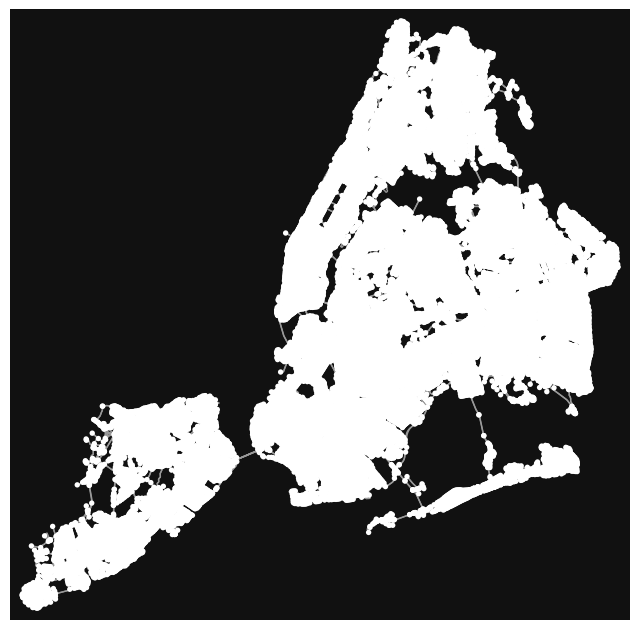

In [4]:
fig, ax = ox.plot_graph(G_drive)

In [5]:
speed_df=pd.read_csv('uber_drive_speeds-2019-Q4.csv') #import uber speed data to update speeds based on TOD
speed_df #= speed_df[['osm_way_id', 'hour_of_day', 'speed_mph_mean']]



,year,quarter,hour_of_day,segment_id,start_junction_id,end_junction_id,osm_way_id,osm_start_node_id,osm_end_node_id,speed_mph_mean,speed_mph_stddev,speed_mph_p50,speed_mph_p85
0,2019,4,15,ffd5b0eb2ebe47dc55977417d7b9de8a2453fbef,33022b4b089929847e9047cbf4d911149b15eb1b,61e031cf1bb3c398a0b67a985cf50d6f4b553d89,627639479,5924962522,5924962521,23.859,4.152,24.099,27.503
1,2019,4,11,ffd5b0eb2ebe47dc55977417d7b9de8a2453fbef,33022b4b089929847e9047cbf4d911149b15eb1b,61e031cf1bb3c398a0b67a985cf50d6f4b553d89,627639479,5924962522,5924962521,23.718,4.322,24.255,27.925
2,2019,4,4,ffd5b0eb2ebe47dc55977417d7b9de8a2453fbef,33022b4b089929847e9047cbf4d911149b15eb1b,61e031cf1bb3c398a0b67a985cf50d6f4b553d89,627639479,5924962522,5924962521,23.367,5.151,22.937,28.699
3,2019,4,14,ffd5b0eb2ebe47dc55977417d7b9de8a2453fbef,33022b4b089929847e9047cbf4d911149b15eb1b,61e031cf1bb3c398a0b67a985cf50d6f4b553d89,627639479,5924962522,5924962521,23.741,4.436,23.827,27.969
4,2019,4,10,ffd5b0eb2ebe47dc55977417d7b9de8a2453fbef,33022b4b089929847e9047cbf4d911149b15eb1b,61e031cf1bb3c398a0b67a985cf50d6f4b553d89,627639479,5924962522,5924962521,23.756,4.160,24.110,27.866
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634416,2019,4,13,667c5005d61fe5d2a599d21b974d429af75111df,b779d487e4efbaeb937965cac05c55a6db09a4e6,2dec661f536826d67c571f2300187b644c31e8f2,5670236,42434175,3590689290,12.707,5.442,12.205,18.731
2634417,2019,4,2,667c5005d61fe5d2a599d21b974d429af75111df,b779d487e4efbaeb937965cac05c55a6db09a4e6,2dec661f536826d67c571f2300187b644c31e8f2,5670236,42434175,3590689290,17.380,4.754,18.667,21.383
2634418,2019,4,5,667c5005d61fe5d2a599d21b974d429af75111df,b779d487e4efbaeb937965cac05c55a6db09a4e6,2dec661f536826d67c571f2300187b644c31e8f2,5670236,42434175,3590689290,18.539,4.590,19.122,22.175
2634419,2019,4,16,667c5005d61fe5d2a599d21b974d429af75111df,b779d487e4efbaeb937965cac05c55a6db09a4e6,2dec661f536826d67c571f2300187b644c31e8f2,5670236,42434175,3590689290,13.352,5.824,13.246,19.955


In [6]:
#use established time periods to assign average speed at that link for the corresponding time of day
speed_dict={}
speed_dict['before_work_speed']= speed_df[(speed_df['hour_of_day']<10) & (speed_df['hour_of_day']>=6)][['osm_way_id','speed_mph_mean']].groupby(['osm_way_id']).mean().round(2).rename(columns={'speed_mph_mean':'before_work_speed'}).to_dict()['before_work_speed']
speed_dict['morning_speed']= speed_df[(speed_df['hour_of_day']<14) & (speed_df['hour_of_day']>=10)][['osm_way_id','speed_mph_mean']].groupby(['osm_way_id']).mean().round(2).rename(columns={'speed_mph_mean':'morning_speed'}).to_dict()['morning_speed']
speed_dict['afternoon_speed']= speed_df[(speed_df['hour_of_day']<18) & (speed_df['hour_of_day']>=14)][['osm_way_id','speed_mph_mean']].groupby(['osm_way_id']).mean().round(2).rename(columns={'speed_mph_mean':'afternoon_speed'}).to_dict()['afternoon_speed']
speed_dict['evening_speed']= speed_df[(speed_df['hour_of_day']<22) & (speed_df['hour_of_day']>=18)][['osm_way_id','speed_mph_mean']].groupby(['osm_way_id']).mean().round(2).rename(columns={'speed_mph_mean':'evening_speed'}).to_dict()['evening_speed'] 

In [7]:
#this creates new weight that is travel time (seconds) based on temporal uber speeds 
error_count1=0
error_count2=0 
edge_count=0
for edge in G_drive.edges:

    
    edge_obj = G_drive[edge[0]][edge[1]][edge[2]]
    
    distance = edge_obj['length']/1000 # Convert from m to km
    wayid = edge_obj['osmid']

    
    if isinstance(wayid, int): 
        edge_count+=1
        
        try:
            before_work_tt = distance/(speed_dict['before_work_speed'][wayid] * 1.60934/3600) # Convert from mph to kph, hours to seconds --> seconds     
        except:

            error_count1+=1
            before_work_tt = edge_obj['travel_time']# seconds 
        try:     
            morning_tt = distance/(speed_dict['morning_speed'][wayid] * 1.60934/3600) # Convert from mph to kps
        except:
            morning_tt = edge_obj['travel_time'] 
        try:
            afternoon_tt = distance/(speed_dict['afternoon_speed'][wayid] * 1.60934/3600) # Convert from mph to kps
        except:
             afternoon_tt = edge_obj['travel_time']
        try:
            evening_tt = distance/(speed_dict['evening_speed'][wayid] * 1.60934/3600) # Convert from mph to kps
        except:
             evening_tt = edge_obj['travel_time']


    else: 
        for j in range(len(wayid)):
            edge_count+=1

            wayid_j=wayid[j]
            try:
                before_work_tt = distance/(speed_dict['before_work_speed'][wayid_j] * 1.60934/3600) # Convert from mph to kph, hours to minutes    
            except:
                error_count1+=1
                before_work_tt = edge_obj['travel_time']# seconds 
            try:     
                morning_tt = distance/(speed_dict['morning_speed'][wayid_j] * 1.60934/3600) # Convert from mph to kps
            except:
                morning_tt = edge_obj['travel_time'] 
            try:
                afternoon_tt = distance/(speed_dict['afternoon_speed'][wayid_j] * 1.60934/3600) # Convert from mph to kps
            except:
                 afternoon_tt = edge_obj['travel_time']
            try:
                evening_tt = distance/(speed_dict['evening_speed'][wayid_j] * 1.60934/3600) # Convert from mph to kps
            except:
                 evening_tt = edge_obj['travel_time']   
        
    G_drive[edge[0]][edge[1]][edge[2]]['before_work_tt'] = round(before_work_tt,2)
    G_drive[edge[0]][edge[1]][edge[2]]['morning_tt'] = round(morning_tt,2)
    G_drive[edge[0]][edge[1]][edge[2]]['afternoon_tt'] = round(afternoon_tt,2)
    G_drive[edge[0]][edge[1]][edge[2]]['evening_tt'] = round(evening_tt,2)


print(error_count1,error_count2,edge_count)

61666 0 159318


In [8]:
gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G_drive, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)
gdf_edges

/tmp/ipykernel_17138/1634806632.py:1: FutureWarning: The `graph_to_gdfs` function has moved to the `convert` module. Calling `utils_graph.graph_to_gdfs` is deprecated and will be removed in the v2.0.0 release. Call it via `convert.graph_to_gdfs` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G_drive, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)


osmid  \
u           v          key                                                      
39076461    42854803   0                                             25161578   
            274283981  0                                [122633397, 25161349]   
39076490    277672046  0                                              5699971   
            277672005  0                                           1014007069   
39076504    462124701  0                      [618709517, 618709515, 5700693]   
...                                                                       ...   
11892679167 42484100   0                                              5677173   
11893511664 42843834   0                                            879833357   
            3324555258 0                                           1281432872   
11899662283 42493976   0                                            276050450   
            42493972   0    [737455620, 221444653, 737317426, 420330748, 7...   

                            oneway        highway reversed   length  \
u           v          key                                            
39076461    42854803   0      True  motorway_link    False  254.709   
            274283981  0      True       motorway    False  767.800   
39076490    277672046  0      True  motorway_link    False  259.674   
            277672005  0      True       motorway    False  291.839   
39076504    462124701  0      True  motorway_link    False  433.148   
...                            ...            ...      ...      ...   
11892679167 42484100   0      True    residential    False  114.304   
11893511664 42843834   0      True      secondary    False   35.430   
            3324555258 0     False      secondary     True   31.178   
11899662283 42493976   0     False      secondary    False  108.177   
            42493972   0     False      secondary     True  259.906   

                                                                     geometry  \
u           v          key                                                      
39076461    42854803   0    LINESTRING (-73.79463 40.78641, -73.79361 40.7...   
            274283981  0    LINESTRING (-73.79463 40.78641, -73.79309 40.7...   
39076490    277672046  0    LINESTRING (-73.75709 40.76243, -73.75721 40.7...   
            277672005  0    LINESTRING (-73.75709 40.76243, -73.75741 40.7...   
39076504    462124701  0    LINESTRING (-73.74416 40.75347, -73.74453 40.7...   
...                                                                       ...   
11892679167 42484100   0    LINESTRING (-74.02274 40.61809, -74.02270 40.6...   
11893511664 42843834   0    LINESTRING (-73.84270 40.70910, -73.84229 40.7...   
            3324555258 0    LINESTRING (-73.84270 40.70910, -73.84284 40.7...   
11899662283 42493976   0    LINESTRING (-73.91835 40.62974, -73.91833 40.6...   
            42493972   0    LINESTRING (-73.91835 40.62974, -73.91839 40.6...   

                            speed_kph  travel_time  before_work_tt  \
u           v          key                                           
39076461    42854803   0         62.0         14.8           34.83   
            274283981  0         80.5         34.3           35.44   
39076490    277672046  0         62.0         15.1           35.14   
            277672005  0         80.5         13.1           13.10   
39076504    462124701  0         62.0         25.2           29.90   
...                               ...          ...             ...   
11892679167 42484100   0         38.9         10.6           23.79   
11893511664 42843834   0         41.8          3.1            3.10   
            3324555258 0         41.8          2.7            2.70   
11899662283 42493976   0         41.8          9.3            9.95   
            42493972   0         41.8         22.4           22.17   

                            morning_tt  ...  lanes  ref                  name  \
u           v          key              ...     

In [9]:
gdf_edges.describe()

,length,speed_kph,travel_time,before_work_tt,morning_tt,afternoon_tt,evening_tt
count,139298.000000,139298.000000,139298.000000,139298.000000,139298.000000,139298.000000,139298.000000
mean,115.597670,40.255610,10.224276,13.445316,13.466904,14.201923,13.665837
std,109.391414,4.789754,8.167701,11.364641,11.600078,12.498233,11.662972
min,1.426000,13.000000,0.100000,0.100000,0.100000,0.100000,0.100000
25%,71.697750,38.900000,6.400000,7.000000,7.000000,7.100000,7.100000
50%,82.130000,38.900000,7.500000,10.100000,10.130000,10.630000,10.260000
75%,146.930000,40.200000,13.300000,17.000000,16.900000,17.800000,17.200000
max,4173.819000,88.500000,201.300000,312.220000,327.480000,342.720000,333.440000


## Spot Check

In [7]:
nyu_coords=ox.distance.nearest_nodes(G_drive, X=-73.986110, Y=40.694340)
home_coords=ox.distance.nearest_nodes(G_drive, X=-73.956030, Y=40.673720)
PL_coords=ox.distance.nearest_nodes(G_drive, X=-73.980711, Y=40.664211)#40.6645972


#travel_time_drive = nx.shortest_path_length(G_drive, home_coords, PL_coords, weight='evening_tt')
travel_time_drive = nx.shortest_path_length(G_drive, home_coords, nyu_coords, weight='evening_tt')
travel_time_drive/60

9.041000000000002

In [8]:
route_nodes = nx.shortest_path(G_drive, home_coords, nyu_coords, weight='evening_tt')
intersections=sum((gdf_nodes.loc[route_nodes,'highway']=='traffic_signals')*1)
intersections

32

# Calculate TT

In [10]:
census_tract=pd.read_csv('geo_files/census_tract_centroid.csv',index_col=0)
census_tract['node']=ox.distance.nearest_nodes(G_drive, list(census_tract['lon']), list(census_tract['lat']), return_dist=False)

census_tract.set_index(keys='GEOID',inplace=True)

census_tract_csv=census_tract[['node']]
census_tract_csv.rename(columns={'node':'drive_node'},inplace=True)
#census_tract_csv.to_csv('~/node_data/CT_nodes_drive.csv')

/tmp/ipykernel_17138/2768291680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_tract_csv.rename(columns={'node':'drive_node'},inplace=True)


In [11]:

fp_df=gpd.read_file('~/FP_data/food_pantry_schedule_final.geojson',index_col=0)

fp_df['node']=ox.distance.nearest_nodes(G_drive, list(fp_df['lng']), list(fp_df['lat']), return_dist=False)

fp_df.set_index('id',inplace=True)
fp_df_csv=fp_df[['node']]
fp_df_csv.rename(columns={'node':'drive_node'},inplace=True)
#fp_df_csv.to_csv('~/node_data/fp_nodes_drive.csv')
fp_node_map=dict(zip(fp_df_csv['drive_node'],fp_df_csv.index))

fp_df


/tmp/ipykernel_17138/4175208554.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_df_csv.rename(columns={'node':'drive_node'},inplace=True)


,Name,Address,Hours FINAL,Hours FPC,Hours Plentiful,lat,lng,Additional Notes,BoroName,Mo_open,...,Fr_open,Fr_close,Sa_open,Sa_close,Su_open,Su_close,Hours_parsed,hours_open,geometry,node
id,,,,,,,,,,,,,,,,,,,,,
84142,St. Albans Baptist Church,196-20 119th Ave,"Sa 10:00AM-12:00PM ""every first and third Satu...","Sa 10:00AM-12:00PM ""every first and third Satu...",NaT,40.690698,-73.753923,- Will not refuse anyone even if they don't ha...,Queens,NaN,...,NaN,NaN,10.0,12.0,NaN,NaN,1.0,2.0,POINT (-73.75392 40.69070),42848148
80413,The Center for Family Life,443 39th St,"tu,we,th 01:00PM-04:00PM","tu,we,th 01:00PM-04:00PM",NaT,40.652009,-74.004742,- Vouchers/tickets are only given out to the f...,Brooklyn,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0,POINT (-74.00474 40.65201),42465434
81578,Family Services Network of New York,1420 Bushwick Ave,"Mo,We 09:00AM-01:00PM","Mo,We 09:00AM-01:00PM",NaT,40.684120,-73.909235,- Visitors will not be denied if they do not h...,Brooklyn,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8.0,POINT (-73.90923 40.68412),42488743
85122,Jamaica Hispanic SDA Church,88-28 161st St,Su 08:00AM-09:00AM,Su 08:00AM-09:00AM,NaT,40.707286,-73.800950,- Visitors will be required to identify how ma...,Queens,NaN,...,NaN,NaN,NaN,NaN,8.0,9.0,1.0,1.0,POINT (-73.80095 40.70729),42811961
81246,New York City Love Kitchen - Food Pantry,3816 9th Ave,"We 11:00AM-12:00PM ""1st and 3rd Wednesday of t...","We 11:00AM-12:00PM ""1st and 3rd Wednesday of t...",NaT,40.862233,-73.918484,- Visitors need to call to register before arr...,Manhattan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,POINT (-73.91848 40.86223),42445054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80162,St. Paul's Evangelical Lutheran Church,1891 McGraw Ave,2023-07-14 08:00AM-10:00AM\n2023-07-21 08:00AM...,Fr 8:00AM-10:00PM,2023-07-14 08:00:00,40.834644,-73.862352,None,Bronx,NaN,...,8.0,22.0,NaN,NaN,NaN,NaN,NaN,14.0,POINT (-73.86235 40.83464),42731597
80373,"Catholic Charities Brooklyn and Queens, St. Ch...",19 Sidney Pl,2023-07-20 08:30AM-01:00PM\n2023-07-27 08:30AM...,Th 08:30AM-9:30AM,2023-07-20 08:30:00,40.692826,-73.991774,None,Brooklyn,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,POINT (-73.99177 40.69283),42497588
FPC-600,"La Jornada, Somos Bendecidos para Bendecir",37-20 111th St,Tu 09:00AM,Tu 09:00AM-10:00AM,NaT,40.753988,-73.857291,None,Queens,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,POINT (-73.85729 40.75399),42816166


In [12]:
CT_gpd = gpd.GeoDataFrame(
    census_tract, geometry=gpd.points_from_xy(census_tract.lon, census_tract.lat))
CT_gpd.set_crs('4326',inplace=True)
CT_gpd.head()

,BoroName,NTA2020,lon,lat,centroid,node,geometry
GEOID,,,,,,,
36061000100,Manhattan,MN0191,-74.042340,40.695673,POINT (-74.04233991488555 40.69567298240604),246901366,POINT (-74.04234 40.69567)
36061000201,Manhattan,MN0301,-73.985848,40.711869,POINT (-73.98584800028144 40.71186871871548),11038072104,POINT (-73.98585 40.71187)
36061000600,Manhattan,MN0301,-73.989477,40.711951,POINT (-73.9894767752886 40.711950582311424),4487582557,POINT (-73.98948 40.71195)
36061001401,Manhattan,MN0302,-73.987332,40.715160,POINT (-73.98733213277733 40.715160475095416),42433551,POINT (-73.98733 40.71516)
36061001402,Manhattan,MN0302,-73.985882,40.717513,POINT (-73.98588163638996 40.71751329107455),7476387556,POINT (-73.98588 40.71751)


In [13]:
node_county_dict=dict(zip(census_tract['node'],census_tract['BoroName']))
with open('node_data/drive_node_county_map.json', 'w') as f:
   # write the dictionary to the file in JSON format
   json.dump(node_county_dict, f)

# with open('node_data/drive_node_county_map.json') as f:
#     node_county_map = json.load(f)

In [14]:
df_tt=make_tt_df(G_drive,gdf_nodes,fp_df,CT_gpd,node_county_dict,mode='Drive',k_nearest=10)
df_tt


Starting  Mo_period_1
Starting  Mo_period_2
Starting  Mo_period_3
Starting  Mo_period_4
Starting  Tu_period_1
Starting  Tu_period_2
Starting  Tu_period_3
Starting  Tu_period_4
Starting  We_period_1
Starting  We_period_2
Starting  We_period_3
Starting  We_period_4
Starting  Th_period_1
Starting  Th_period_2
Starting  Th_period_3
Starting  Th_period_4
Starting  Fr_period_1
Starting  Fr_period_2
Starting  Fr_period_3
Starting  Fr_period_4
Starting  Sa_period_1
Starting  Sa_period_2
Starting  Sa_period_3
Starting  Sa_period_4
Starting  Su_period_1
Starting  Su_period_2
Starting  Su_period_3
Starting  Su_period_4
Finished  Tu_period_2
Finished  We_period_2
Finished  Th_period_2
Finished  Tu_period_3
Finished  We_period_3
Finished  Mo_period_2
Finished  Sa_period_2
Finished  Fr_period_2
Finished  Th_period_3
Finished  We_period_1
Finished  Th_period_1
Finished  Fr_period_3
Finished  Mo_period_3
Finished  Tu_period_1
Finished  Fr_period_1
Finished  Sa_period_1
Finished  Mo_period_1
Finished  

,Mo_period_1_nearest,Mo_period_1_tt,Mo_period_1_tt_3,Mo_period_2_nearest,Mo_period_2_tt,Mo_period_2_tt_3,Mo_period_3_nearest,Mo_period_3_tt,Mo_period_3_tt_3,Mo_period_4_nearest,...,Su_period_1_tt_3,Su_period_2_nearest,Su_period_2_tt,Su_period_2_tt_3,Su_period_3_nearest,Su_period_3_tt,Su_period_3_tt_3,Su_period_4_nearest,Su_period_4_tt,Su_period_4_tt_3
246901366,42446640,0.84,1.59,42446640,0.82,2.96,42446640,0.84,2.95,42446640,...,7.33,42424864,5.43,5.95,42424864,5.45,6.35,42430154,5.31,10.95
11038072104,42432099,1.93,2.14,42447428,1.45,1.84,42427346,2.11,2.77,42427346,...,6.98,42430154,6.11,6.35,42430154,6.22,6.90,42430154,6.17,8.71
4487582557,42453700,1.5,1.93,42453700,1.56,1.79,42453700,1.68,2.68,42427346,...,7.06,42430154,5.5,6.31,42430154,5.81,6.50,42430154,5.6,9.33
42433551,42453700,1.4,1.57,42447428,1.15,1.45,42453700,1.48,2.29,42427346,...,7.01,42430154,5.62,6.36,42430154,5.77,6.63,42430154,5.64,9.20
7476387556,42427346,0.92,2.00,42427346,0.91,1.51,42427346,0.93,2.46,42427346,...,7.29,42430154,5.96,6.60,42430154,6.14,7.06,42430154,6.06,9.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452272260,42498750,6.54,7.69,42504933,5.99,6.95,42498750,6.76,8.39,42498750,...,23.84,42487664,6.78,10.24,11377023695,14.85,15.85,42991479,18.23,20.93
42430945,42455412,0.8,2.48,42455412,0.72,1.89,42455412,0.72,2.86,42427346,...,7.01,42446934,6.18,6.34,42430154,6.59,7.39,42430154,6.58,8.55
42469494,42482174,5.37,6.93,42482174,5.97,7.74,42492309,8.9,9.91,42427346,...,11.22,42446934,10.25,11.68,278631323,11.0,12.08,42430154,11.81,12.64
42472893,42474971,3.79,7.57,42472141,1.98,2.72,42472141,2.12,4.97,42501880,...,12.53,42472141,1.98,3.57,42537496,7.21,7.63,42430154,15.05,18.92


In [15]:
#map node to CT then save 
k_nearest=10
df_tt_=census_tract_csv.merge(df_tt,left_on='drive_node',right_index=True).drop(columns=['drive_node'])
#maps FP nodes to FP IDs
for col in [i for i in df_tt_.columns if 'nearest' in i]:
    df_tt_[col]=df_tt_[col].map(fp_node_map)
    
for col in [i for i in df_tt_.columns if 'tt' in i]:
    df_tt_[col]=df_tt_[col].astype('float')

df_tt_.to_csv('~/travel_time_df/df_tt_drive_k'+str(k_nearest)+'_no_model.csv')

In [ ]:
df_tt

In [ ]:
df_tt_10=df_tt_.copy()
df_tt_10.head()

In [72]:
df_tt_10.dtypes

Mo_period_1_nearest     object
Mo_period_1_tt         float64
Mo_period_1_stops      float64
Mo_period_2_nearest     object
Mo_period_2_tt         float64
                        ...   
Su_period_3_tt         float64
Su_period_3_stops      float64
Su_period_4_nearest     object
Su_period_4_tt         float64
Su_period_4_stops      float64
Length: 84, dtype: object

In [24]:
for i in [j for j in df_tt_5.columns if 'nearest' in j]:
    print(i)
    
    df_comp_=df_tt_25[[i]].merge(df_tt_10[[i]],left_index=True,right_index=True).rename(
        columns={i+'_x':'k10a',i+'_y':'k10'})
    df_comp_=df_comp_.merge(df_tt_3[[i]],left_index=True,right_index=True).rename(
        columns={i:'k5'})
    #display(df_comp_)
    print('10a,10',(df_comp_['k10a']==df_comp_['k10']).value_counts().values)
    print('10,5',(df_comp_['k10']==df_comp_['k5']).value_counts().values)
    print('10a,5',(df_comp_['k10a']==df_comp_['k5']).value_counts().values)
    print()

Mo_period_1_nearest
10a,10 [2218  177]
10,5 [2218  177]
10a,5 [2395]

Mo_period_2_nearest
10a,10 [2131  264]
10,5 [2131  264]
10a,5 [2395]

Mo_period_3_nearest
10a,10 [2215  180]
10,5 [2215  180]
10a,5 [2395]

Mo_period_4_nearest
10a,10 [1819  576]
10,5 [1819  576]
10a,5 [2395]

Tu_period_1_nearest
10a,10 [2211  184]
10,5 [2211  184]
10a,5 [2395]

Tu_period_2_nearest
10a,10 [2137  258]
10,5 [2137  258]
10a,5 [2395]

Tu_period_3_nearest
10a,10 [2173  222]
10,5 [2173  222]
10a,5 [2395]

Tu_period_4_nearest
10a,10 [1851  544]
10,5 [1851  544]
10a,5 [2395]

We_period_1_nearest
10a,10 [2196  199]
10,5 [2196  199]
10a,5 [2395]

We_period_2_nearest
10a,10 [2195  200]
10,5 [2195  200]
10a,5 [2395]

We_period_3_nearest
10a,10 [2274  121]
10,5 [2274  121]
10a,5 [2395]

We_period_4_nearest
10a,10 [1785  610]
10,5 [1785  610]
10a,5 [2395]

Th_period_1_nearest
10a,10 [2268  127]
10,5 [2268  127]
10a,5 [2395]

Th_period_2_nearest
10a,10 [2209  186]
10,5 [2209  186]
10a,5 [2395]

Th_period_3_nearest


In [17]:
df_tt_3=pd.read_csv('travel_time_df/df_tt_drive_k3.csv')
df_tt_10=pd.read_csv('travel_time_df/df_tt_drive_k10.csv')
df_tt_25=pd.read_csv('travel_time_df/df_tt_drive_k25.csv')

In [24]:
avg_list_1=[]
avg_list_2=[]
for i in [j for j in df_tt_3.columns if 'nearest' in j]:
    print(i)
    
    df_comp_=df_tt_25[[i]].merge(df_tt_3[[i]],left_index=True,right_index=True).rename(
        columns={i+'_x':'k25',i+'_y':'k3'})
    df_comp_=df_comp_.merge(df_tt_10[[i]],left_index=True,right_index=True).rename(
        columns={i:'k10'})
    #display(df_comp_)
    print('25,3',(df_comp_['k25']==df_comp_['k3']).value_counts().values)
    print('10,25',(df_comp_['k10']==df_comp_['k25']).value_counts().values)
    print('10,3',(df_comp_['k10']==df_comp_['k3']).value_counts().values)
    print()

    avg_list_1.append(((df_comp_['k25']==df_comp_['k10']).value_counts().values[0])/2325)   
    avg_list_2.append(((df_comp_['k10']==df_comp_['k3']).value_counts().values[0])/2325)
print('25/10',np.mean(avg_list_1))
print('10/3',np.mean(avg_list_2))


Mo_period_1_nearest
25,3 [2028  307]
10,25 [2264   71]
10,3 [2063  272]

Mo_period_2_nearest
25,3 [2070  265]
10,25 [2274   61]
10,3 [2103  232]

Mo_period_3_nearest
25,3 [2050  285]
10,25 [2288   47]
10,3 [2074  261]

Mo_period_4_nearest
25,3 [2077  258]
10,25 [2331    4]
10,3 [2078  257]

Tu_period_1_nearest
25,3 [2055  280]
10,25 [2282   53]
10,3 [2084  251]

Tu_period_2_nearest
25,3 [2163  172]
10,25 [2316   19]
10,3 [2177  158]

Tu_period_3_nearest
25,3 [2141  194]
10,25 [2318   17]
10,3 [2152  183]

Tu_period_4_nearest
25,3 [2246   89]
10,25 [2335]
10,3 [2246   89]

We_period_1_nearest
25,3 [2093  242]
10,25 [2272   63]
10,3 [2120  215]

We_period_2_nearest
25,3 [2202  133]
10,25 [2318   17]
10,3 [2207  128]

We_period_3_nearest
25,3 [2129  206]
10,25 [2307   28]
10,3 [2150  185]

We_period_4_nearest
25,3 [2168  167]
10,25 [2331    4]
10,3 [2172  163]

Th_period_1_nearest
25,3 [2163  172]
10,25 [2318   17]
10,3 [2171  164]

Th_period_2_nearest
25,3 [2192  143]
10,25 [2320   15]
1